In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload

%autoreload 2

In [2]:
def imshow(image: np.array, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.show()

In [5]:
from models.image import Image

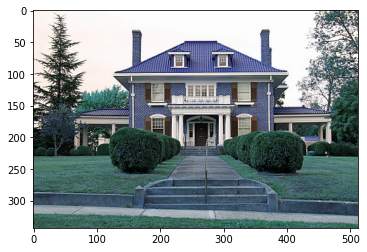

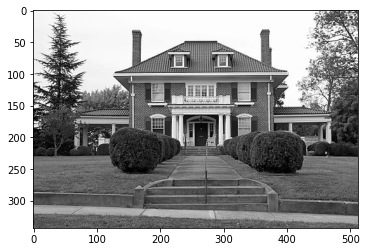

In [6]:
image = Image()
image.load('../data/images/house.jpg')
imshow(image.img)
gray = cv2.cvtColor(image.img, cv2.COLOR_BGR2GRAY)
imshow(gray, "gray")

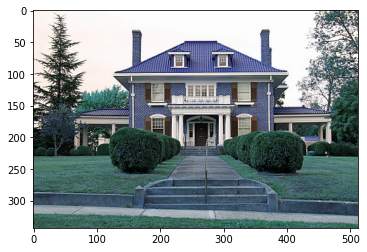

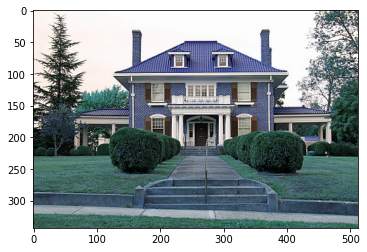

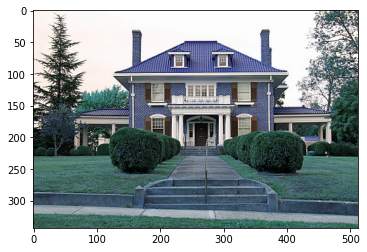

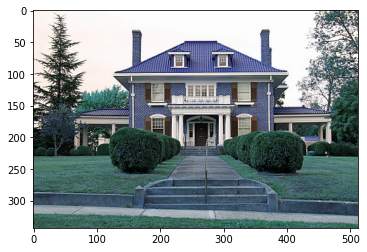

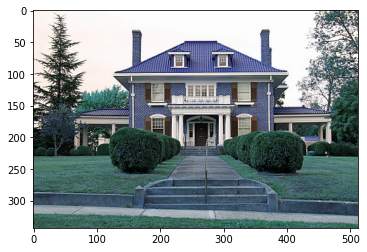

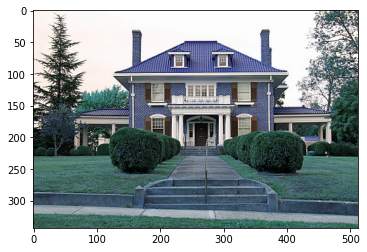

In [20]:
# import your func
# from modules.thresholding import threshHandler
# from modules.histogramManipulation import histogramManipulationHandler
# from modules.sharpening import sharpenHandler 
# from modules.otsuThresholding import OstuThresholdingHandler
# from modules.AdaptiveThresholding import adaptiveThresholdingHandler
# from modules.averageBlur import averageBlurringHandler
# from modules.bilateralBlur import bilateralBlurringHandler
# from modules.gaussianBlur import gaussianBlurringHandler
# from modules.cornerDetection import cornerDetectionHandler

# imshow(threshHandler(image, {'threshold_value': 150}).img, cmap='gray')
# imshow(histogramManipulationHandler(image, {'contrast_limit': 1}).img, cmap='gray')
# imshow(OstuThresholdingHandler(image, {}).img, cmap='gray')
# imshow(adaptiveThresholdingHandler(image, {'threshold_value': 0.75}).img, cmap='gray')
# imshow(sharpenHandler(image, {'kernel_size': 7, 'strength': 0}).img, cmap='gray')
# imshow(averageBlurringHandler(image, {'Blur amount': 5}).img, cmap='gray')
# imshow(bilateralBlurringHandler(image, {}).img, cmap='gray')
# imshow(gaussianBlurringHandler(image, {'sigmaX': 1, 'sigmaY': 0}).img, cmap='gray')
# imshow(cornerDetectionHandler(image, {'kernel_size': 5, 'sharpen_strength': 1}).img, cmap='gray')
imshow(cv2.GaussianBlur(image.img, (5, 5), 0.1, 0.1))